Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%

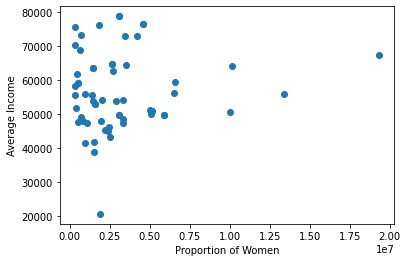

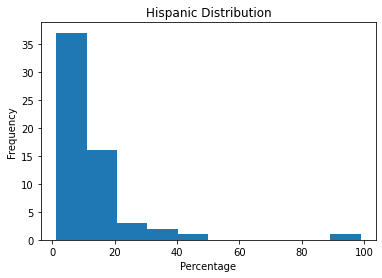

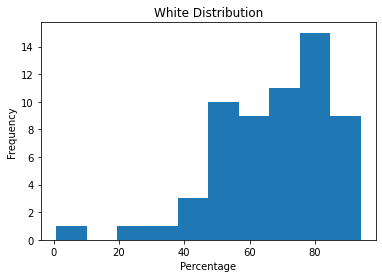

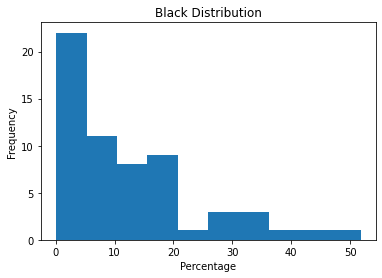

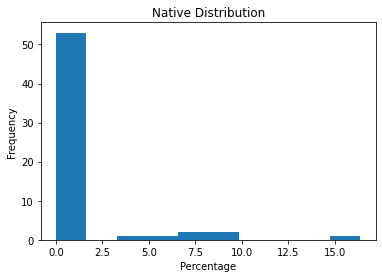

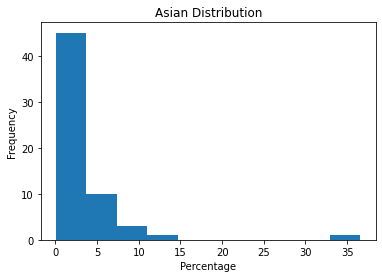

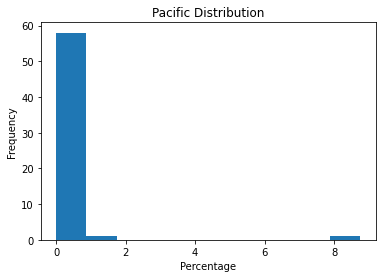

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Loading data into DataFrame
all_files = glob.glob("*.csv")
us_census = pd.concat((pd.read_csv(f) for f in all_files))

# Inspecting DataFrame
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

# Cleaning
us_census['Income'] = pd.to_numeric(us_census['Income'].replace('[\$,]', '', regex=True))
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)
us_census['Men'] = pd.to_numeric(us_census['Men'].replace('[M]', '', regex=True))
us_census['Women'] = pd.to_numeric(us_census['Women'].replace('[F]', '', regex=True))
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
us_census = us_census.drop_duplicates()

# Visualizing data
plt.scatter(us_census['Women'], us_census['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')
plt.show()

# Creating histograms of  race data
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for race in race_columns:
    us_census[race] = pd.to_numeric(us_census[race].replace('[\%,]', '', regex=True))
    us_census[race] = us_census[race].fillna(value=us_census[race].mean())
    plt.hist(us_census[race])
    plt.title(f'{race} Distribution')
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.show()
